<a href="https://colab.research.google.com/github/ramrakhyaniRiya/Capstone_2/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drive Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Dataset

In [3]:
file_path = '/content/drive/MyDrive/CAPSTONE 2/SeoulBikeData.csv'
df=pd.read_csv(file_path,encoding='iso-8859-1')

# Basic Operations 

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
df.shape

(8760, 14)

In [9]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

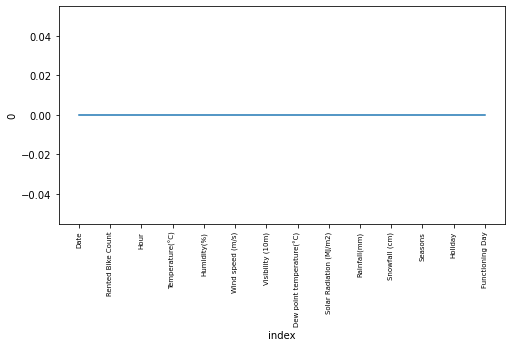

In [11]:
a = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(8,4))
b =sns.lineplot('index',0,data=a)
plt.xticks(rotation =90,fontsize =7)

# As we can see There are no missing values in dataset

# Creating Heatmap and find co-relation between different columns with each other

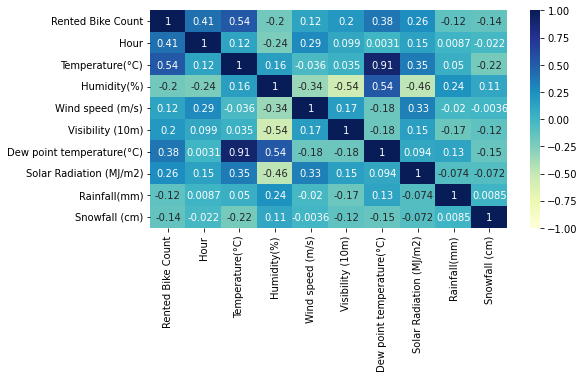

In [12]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), vmin=-1, cmap='YlGnBu', annot=True)

In [13]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [14]:
df = df.rename(columns = {'Rented Bike Count' : 'Rented_Bike_Count',
                          'Temperature(°C)' :'Temperature',
                          'Humidity(%)':'Humidity',
                          'Wind speed (m/s)': 'Wind_Speed',
                          'Visibility (10m)':'Visibility',
                          'Dew point temperature(°C)':'Dew_point_temperature',
                          'Solar Radiation (MJ/m2)':'Solar_Radiation',
                          'Rainfall(mm)':'Rainfall',
                          'Snowfall (cm)':'Snowfall',
                          'Functioning Day':'Functioning_Day'})

In [15]:
df['Date']=pd.to_datetime(df['Date'])

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [16]:
df.drop('Date',axis=1,inplace=True)

In [17]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [19]:
df.dtypes

Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_Speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
Day                        int64
Month                      int64
Year                       int64
dtype: object

In [20]:
df.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_Speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
Day                        31
Month                      12
Year                        2
dtype: int64

## ***EDA***

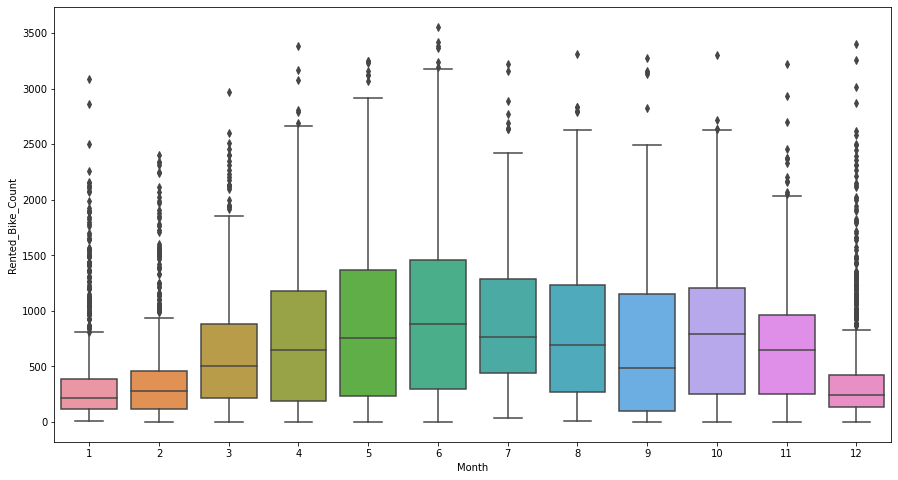

In [21]:
plt.figure(figsize = (15,8))
sns.boxplot(y = "Rented_Bike_Count", x = "Month", data = df)
plt.show()

**From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour')]

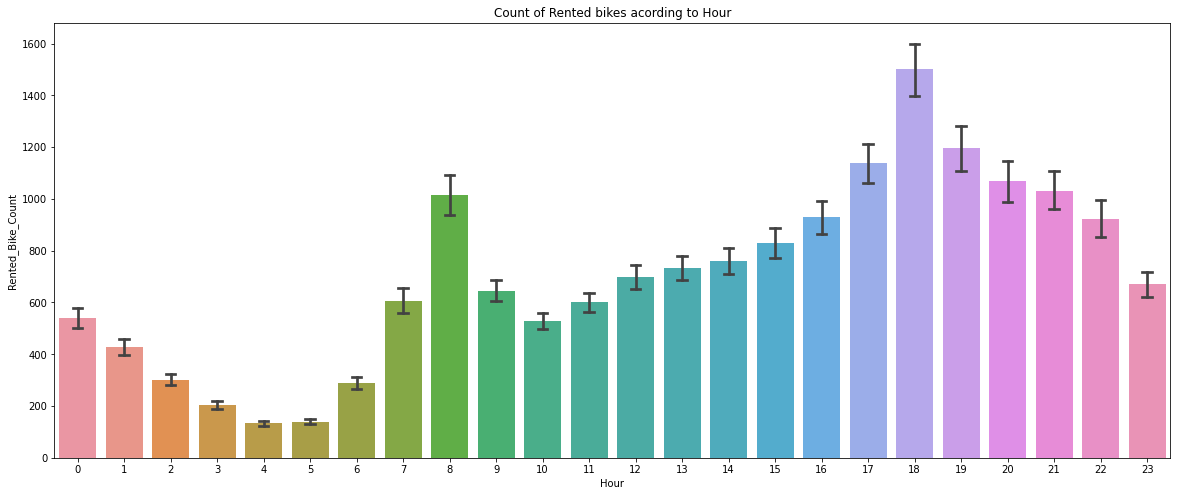

In [22]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour')

From the above plot it shows that people generally prefer bike bookings at the time of 7am to 9am and 5pm to 8pm

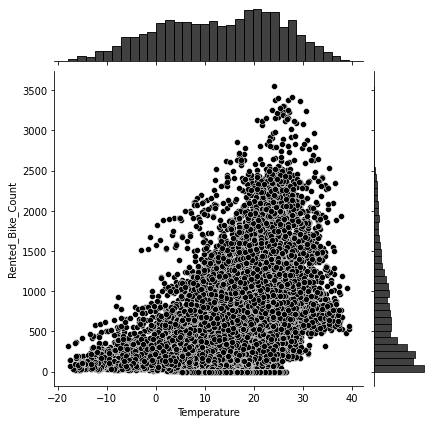

In [23]:
sns.jointplot(data=df, x='Temperature', y='Rented_Bike_Count' , color = 'black')

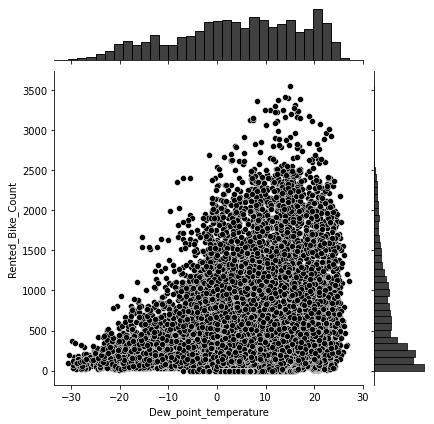

In [24]:
sns.jointplot(data=df, x='Dew_point_temperature', y='Rented_Bike_Count' , color = 'black')

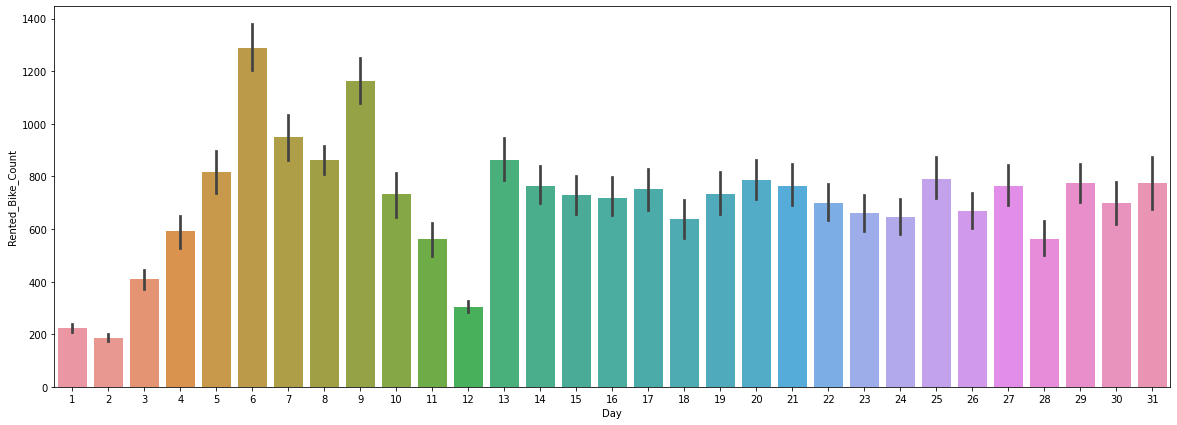

In [25]:
plt.figure(figsize = (20,7))
sns.barplot(x = 'Day', y = 'Rented_Bike_Count', data = df)

<Figure size 1440x504 with 0 Axes>

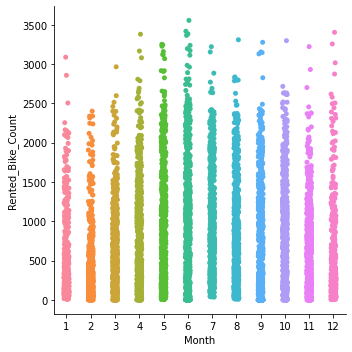

In [27]:
plt.figure(figsize = (20,7))
sns.catplot(x = 'Month', y = 'Rented_Bike_Count', data = df)

<Figure size 1440x504 with 0 Axes>

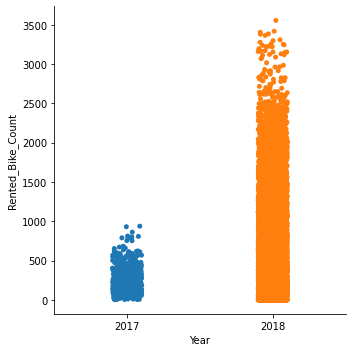

In [29]:
plt.figure(figsize = (20,7))
sns.catplot(x = 'Year', y = 'Rented_Bike_Count', data = df)

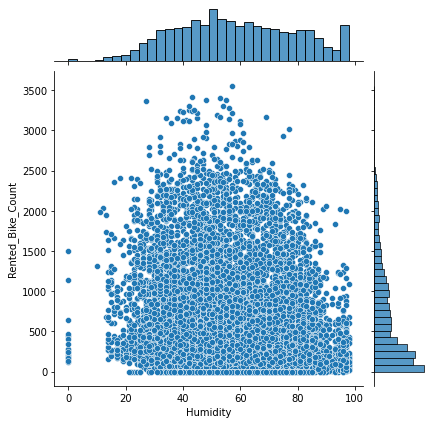

In [30]:
sns.jointplot(data=df, x="Humidity", y="Rented_Bike_Count")

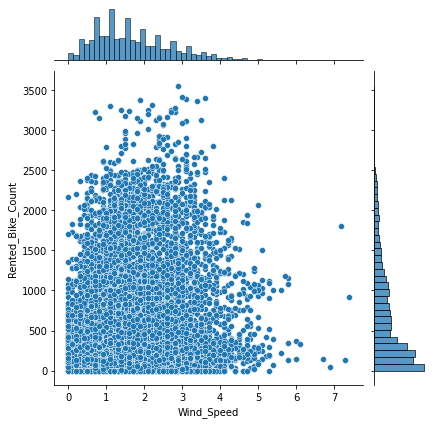

In [32]:
sns.jointplot(data=df, x="Wind_Speed", y="Rented_Bike_Count")

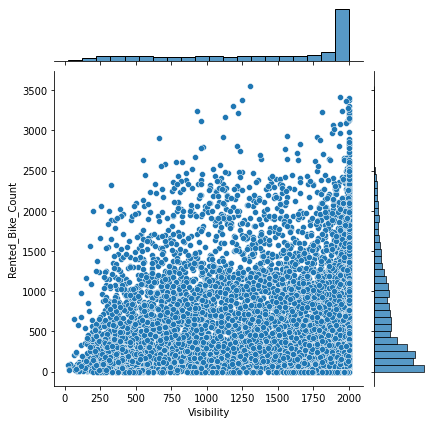

In [31]:
sns.jointplot(data=df, x="Visibility", y="Rented_Bike_Count")

<Figure size 720x288 with 0 Axes>

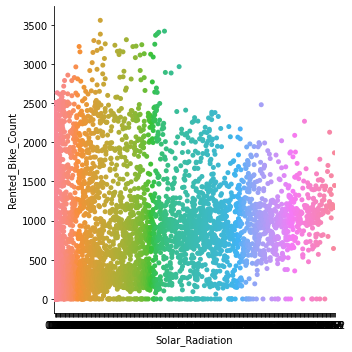

In [33]:
plt.figure(figsize = (10,4))
sns.catplot(x = 'Solar_Radiation', y = 'Rented_Bike_Count', data = df)

From the above plot we see that, the number of rented bikes is huge, when there is solar radiation, the count of rented bikes has a mean around 1000

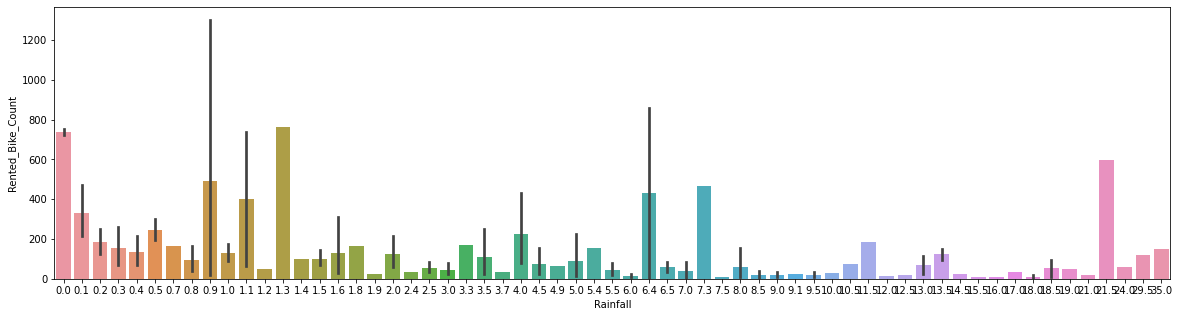

In [34]:
plt.figure(figsize=(20,5))
sns.barplot(x='Rainfall',y='Rented_Bike_Count',data=df)

When there is rainfall 0.9 mm the demand of rental bikes are in demand

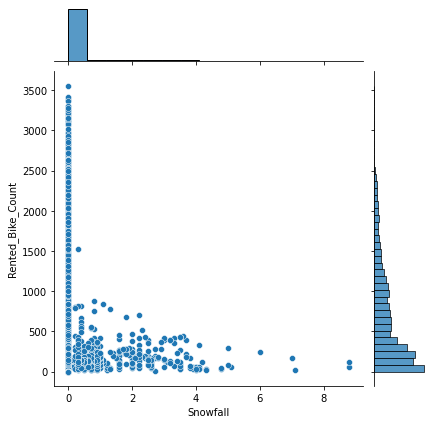

In [35]:
sns.jointplot(data=df, x="Snowfall", y="Rented_Bike_Count")

In [40]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

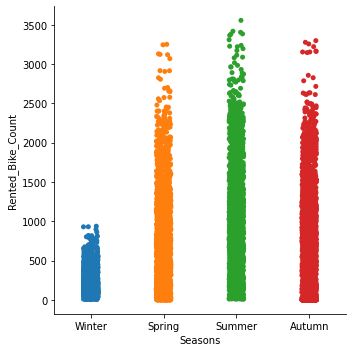

In [37]:
sns.catplot(data=df, x="Seasons", y="Rented_Bike_Count")

From the above plot we can conclude that the most of the bikes are rented in summer 

In [39]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

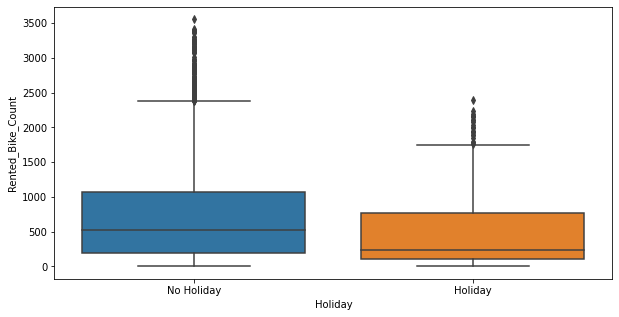

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Holiday', y = 'Rented_Bike_Count',data= df)

Majority of the data is from non-holiday days

In [41]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

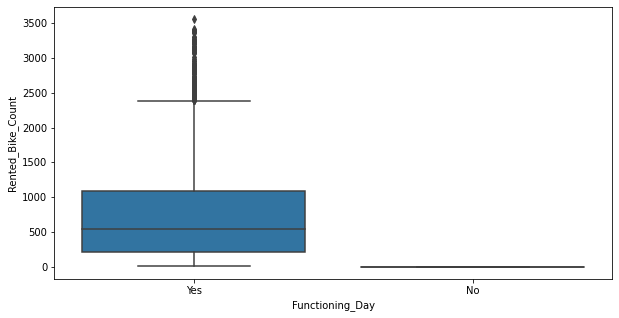

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Functioning_Day', y = 'Rented_Bike_Count',data= df)

Majority of the data is for Functioning Days.


In [45]:
df.dtypes

Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_Speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
Day                        int64
Month                      int64
Year                       int64
dtype: object

In [44]:
# Categorical Column
cat_col = [i for i in df.columns if df[i].dtype=='O']
cat_col

['Seasons', 'Holiday', 'Functioning_Day']

In [46]:
# Continuous Column
cont_col = [i for i in df.columns if df[i].dtype!='O']
cont_col

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_Speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Day',
 'Month',
 'Year']



---



---




# One-Hot Encoding

In [47]:
df = pd.get_dummies(df,columns = ['Seasons', 'Holiday', 'Functioning_Day'])

In [48]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,...,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1


In [49]:
df.dtypes

Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_Speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Day                        int64
Month                      int64
Year                       int64
Seasons_Autumn             uint8
Seasons_Spring             uint8
Seasons_Summer             uint8
Seasons_Winter             uint8
Holiday_Holiday            uint8
Holiday_No Holiday         uint8
Functioning_Day_No         uint8
Functioning_Day_Yes        uint8
dtype: object

In [50]:
x = df.drop('Rented_Bike_Count',axis=1)
x.head() #dependent data

,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Day,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1


In [51]:
y = df['Rented_Bike_Count'] #independent data
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented_Bike_Count, Length: 8760, dtype: int64

In [52]:
def plot(df,col):
  fig,(ax1,ax2)=plt.subplots(2,1) 
  sns.distplot(df[col],ax = ax1)
  sns.boxplot(df[col],ax = ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


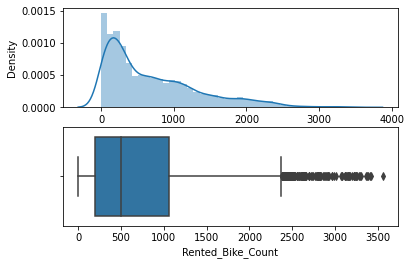

In [55]:
plot(df,'Rented_Bike_Count')

## Importing Sklearn Models

In [57]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [58]:
mutual_info_classif(x,y)

array([0.24965699, 0.32854722, 0.11173446, 0.03957517, 0.14158307,
       0.20999135, 0.13967282, 0.05399923, 0.01989761, 0.09863324,
       0.17312126, 3.12293113, 0.23555797, 0.12449257, 0.24856679,
       0.35843894, 0.0076304 , 3.95254755, 0.14965548, 4.50986227])

In [59]:
imp = pd.DataFrame(mutual_info_classif(x,y),index = x.columns)
imp

,0
Hour,0.259053
Temperature,0.328158
Humidity,0.112872
Wind_Speed,0.044260
Visibility,0.139453
Dew_point_temperature,0.208908
Solar_Radiation,0.128489
Rainfall,0.036043
Snowfall,0.022128
Day,0.101482


In [60]:
imp.columns = ['Importance']
imp.sort_values(by='Importance',ascending = False)

,Importance
Functioning_Day_Yes,4.504622
Holiday_No Holiday,4.059953
Year,3.113684
Seasons_Winter,0.370758
Temperature,0.328158
Seasons_Summer,0.266453
Hour,0.259053
Seasons_Autumn,0.243891
Dew_point_temperature,0.208908
Month,0.174361


In [61]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.25)

In [62]:
from sklearn import metrics
def predict(ml_model):
    model = ml_model.fit(x_train , y_train)
    print('Training score: {}'.format(model.score(x_train , y_train)))

    predictions = model.predict(x_test)
    print('Predictions are:{}'.format(predictions))

    print('\n')

    r2_score = metrics.r2_score(y_test,predictions)
    print('r2 score is:{}'.format(r2_score))

    print('MAE',metrics.mean_absolute_error(y_test,predictions))
    print('MSE',metrics.mean_squared_error(y_test,predictions))
    print('RMSE',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    sns.distplot(y_test-predictions)

Training score: 0.5471237313772466
Predictions are:[ 612.77072722 1425.35835357  797.62457132 ...  -11.01528459 1105.23290264
  509.75874236]


r2 score is:0.5626127013544175
MAE 323.37890226726444
MSE 192005.66719432326
RMSE 17.982739009040433


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


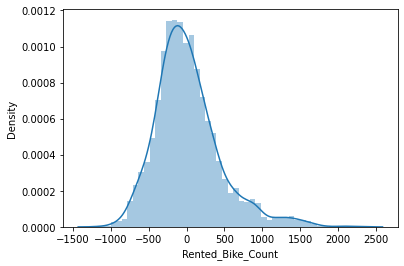

In [63]:
predict(LinearRegression())

Training score: 1.0
Predictions are:[ 489. 1466.  246. ...  206. 1305.  285.]


r2 score is:0.8148647334038183
MAE 164.63059360730594
MSE 81271.26803652968
RMSE 12.830845397217828


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


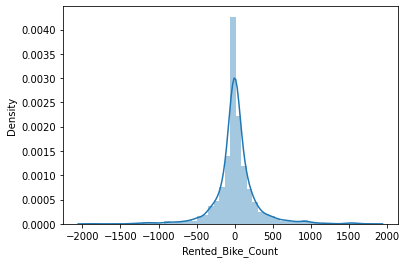

In [64]:
predict(DecisionTreeRegressor())

Training score: 0.9821749208855328
Predictions are:[ 899.95 1460.27  222.53 ...  143.36 1241.14  275.44]


r2 score is:0.8896490822735598
MAE 134.14153881278537
MSE 48442.19676515981
RMSE 11.581948834837139


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


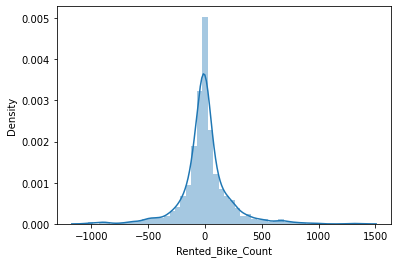

In [65]:
predict(RandomForestRegressor())